In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from utils import spectrum

In [2]:
data=np.load('20200129_All_data_lists.npz',allow_pickle=True)

All_freqs,All_ints,All_unique_freqs,\
All_unique_ints,All_unique_inds,all_angles=\
(data["arr_0"],data["arr_1"],data["arr_2"],\
 data["arr_3"],data["arr_4"],data["arr_5"])

all_sorted_angles=np.sort(all_angles)
sorted_indices=np.argsort(all_angles)

All_sorted_freqs=All_freqs[sorted_indices]
All_sorted_ints=All_ints[sorted_indices]

#Filter and collect intensities and corresponding frequencies
filtered_ints=[]
filtered_freqs=[]
for sys_idx in range(len(All_ints)):

    #Intensities larger than 1/100 of the max intensity
    filt_inds=np.where(All_sorted_ints[sys_idx]>np.max(All_sorted_ints[sys_idx])/100)[0]
    
    filtered_ints.append(All_sorted_ints[sys_idx][filt_inds])
    filtered_freqs.append(All_sorted_freqs[sys_idx][filt_inds])

In [3]:
from pytictoc import TicToc
t = TicToc() ## TicToc("name")

#Construct spectra using filtered intensities
#FWHM Width of the Lorentzian used for broadening
# in cm^-1
gamma=0.5

#Disregard freqs smaller than 1cm^{-1}
#grid density 0.25cm$^{-1}$
test_freqs,step=np.linspace(1.0,1750,endpoint=True,num=7000,retstep=True) 

All_spectra=np.zeros((len(test_freqs),len(All_freqs)))

t.tic()
for sys_idx in range(len(All_ints)):

    #spectrum function from utils.py
    All_spectra[:,sys_idx]=\
    spectrum(test_freqs,filtered_freqs[sys_idx],filtered_ints[sys_idx],gamma,step)

t.toc()

print(All_spectra.shape)

Elapsed time is 4.241369 seconds.
(7000, 692)


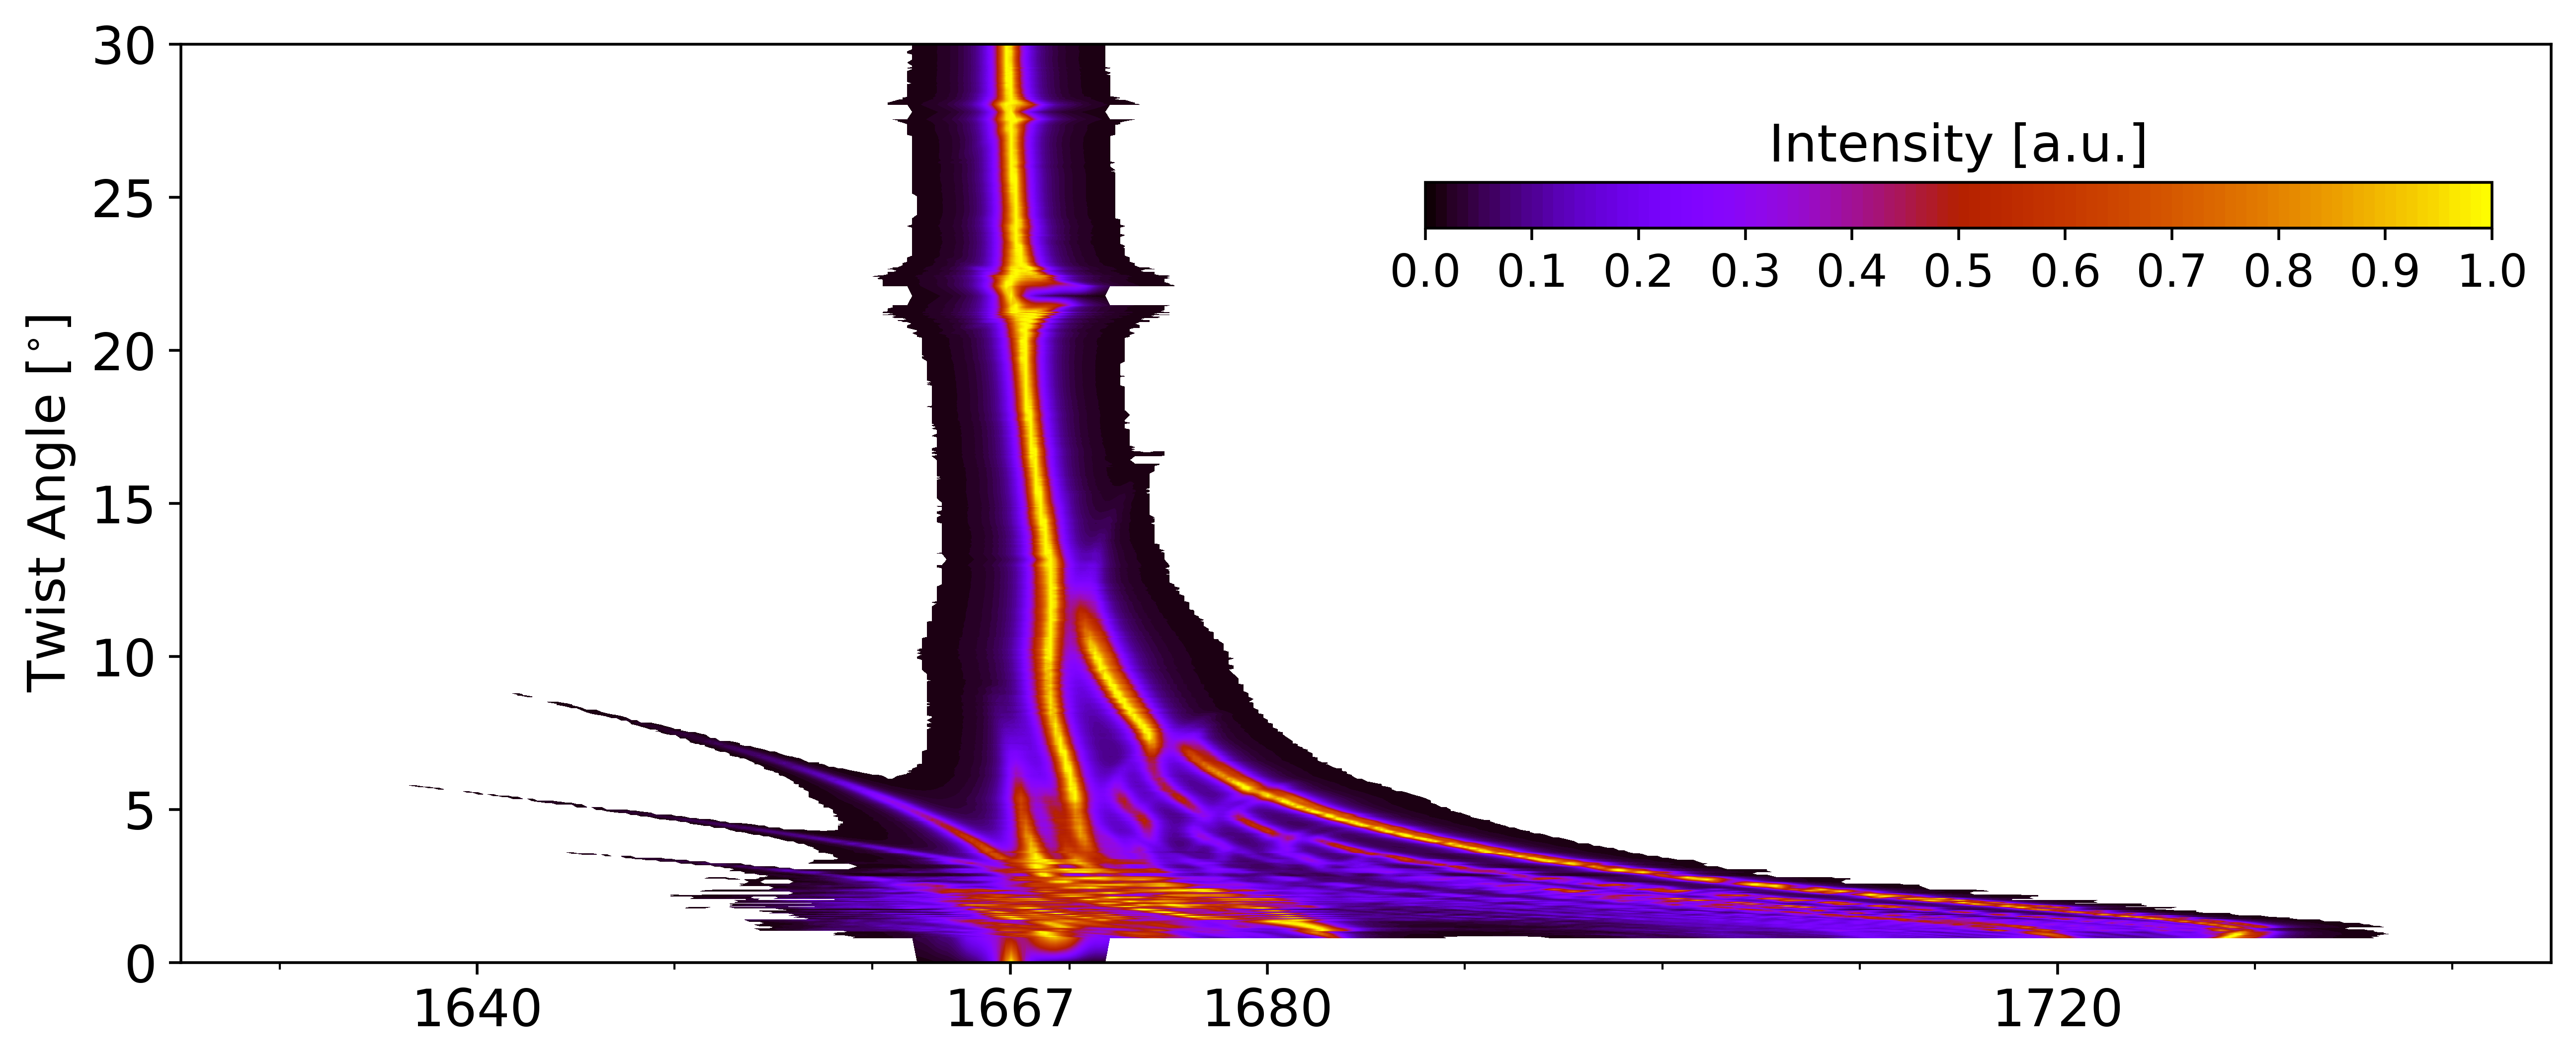

In [4]:
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import time
timestr = time.strftime("%Y%m%d")
# print(timestr)

fig, ax = plt.subplots(1, 1,figsize=plt.figaspect(0.39), dpi=500, facecolor='w', edgecolor='k')

#Data to be plotted
X,Y, Z = test_freqs,all_sorted_angles,np.transpose(All_spectra)

Z = np.ma.masked_where(Z < 0.01, Z)

levels = MaxNLocator(nbins=100).tick_values(np.round(Z.min(),1), Z.max())

cmap = plt.get_cmap('gnuplot')
cmap.set_bad(color='white')

from matplotlib import ticker, cm
cf = ax.contourf(X,Y,Z, levels=levels,
                  cmap=cmap)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins1 = inset_axes(ax,
                    width="45%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower right',
                    bbox_to_anchor=(-0.025, 0.8, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)

cbar=fig.colorbar(cf,pad=0.01,cax=axins1,orientation='horizontal',extend='min')

cbar.ax.set_xlim([0.,1.])
cbar.ax.xaxis.set_major_locator(MultipleLocator(0.1))
cbar.ax.tick_params(labelsize=13) 
cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cbar.ax.set_title(r'Intensity [a.u.]', fontsize=15)

ax.set_ylim([0,30])

ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(40))

currentticks=ax.get_xticks()
ax.set_xticks(np.append(currentticks,1667))
ax.set_xlim([1625.,1745])


ax.set_ylabel(r'Twist Angle [$^{\circ}$]',fontsize=15)

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax.tick_params(axis='both', which='both',labelsize=15,right=False) 

plt.show()